In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from tqdm import tqdm
import pandas as pd

In [2]:
# Condicion de Señal O Ruido
def ClasificarEvento(x,y,d,r):
    
    if x**2 + (y-d)**2 <= r**2:
        return 1
    else:
        return 0

In [3]:
# Parametros para los datos
R = 1.0
D = 3.0

V0 = 7.
g = 9.8

phimin = 45.
phimax = 135.
thetamin = 45.
thetamax = 80.

phimin *= np.pi/180.
phimax *= np.pi/180.
thetamin *= np.pi/180.
thetamax *= np.pi/180.

In [4]:
NEvents = 100
OutName = 'data/Set2.csv'
ColNames = ['Phi','Theta','Tipo']

In [5]:
# Definimos el DataFrame
data = pd.DataFrame(columns=ColNames,index=range(NEvents))

In [6]:
data.head(3)

,Phi,Theta,Tipo
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [7]:
# Para la simulacion
Trayectoria = []

for i in tqdm(range(NEvents)):
    
    #Elegimos una orientacion al azar para el disparo
    Phi = np.random.uniform(phimin,phimax)
    Theta = np.random.uniform(thetamin,thetamax)

    xt, yt, zt = 0.,0.,0.
    dt = 0.01    
    
    t = 0.
    tmax = 2*V0*np.cos(Theta)/g
    
    x = []
    y = []
    z = []
    
    # Evolucion
    while (t <= tmax):
    
        xt = V0*np.cos(Phi)*np.sin(Theta)*t
        yt = V0*np.sin(Phi)*np.sin(Theta)*t
        zt = V0*np.cos(Theta)*t-0.5*g*t**2
        
        x.append(xt)
        y.append(yt)
        z.append(zt)
        
        t += dt
        
    Trayectoria.append([x,y,z])
    # Tomamos Posicion de Llegada en el plano XY
    
    xf = x[-1]
    yf = y[-1]
    
    # Clasificamos como señal o ruido
    Tipo = ClasificarEvento(xf,yf,D,R)
    
    Event = [Phi,Theta,Tipo]
    # Llenamos cada evento en el dataFrame
    data.iloc[i] = Event

#Agregando elemnos al array
#EventVector = np.append(EventVector,[Event],axis=0)
#Eliminando primera fila
#EventVector = np.delete(EventVector,(0),axis=0)

100%|██████████| 100/100 [00:00<00:00, 301.46it/s]


In [8]:
# Para hacer el Circulo en el plot

t = np.linspace(0.,2*np.pi, 15)

x1 = R*np.cos(t)
y1 = np.sqrt(  R**2 - x1**2 ) + D
y2 = -np.sqrt(  R**2 - x1**2 ) + D
z1 = np.zeros(len(x1))

<IPython.core.display.Javascript object>


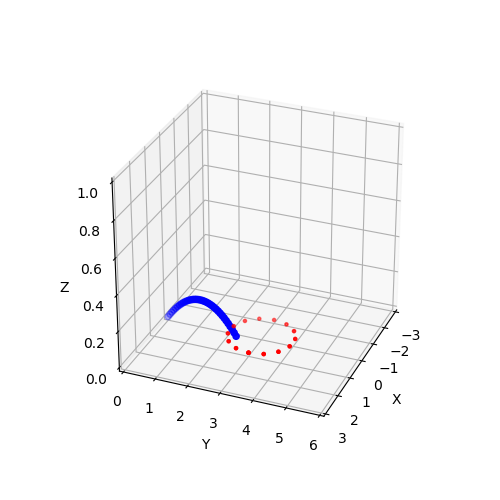

In [9]:
Nframes = len(Trayectoria)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 29, azim = 22)


def init():
    
    ax.set_xlim3d(-3.,3.)
    ax.set_ylim3d(0.,6.)
    ax.set_zlim3d(0.,1.)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
def animate(i):
    
    plot = ax.clear()
    init()
    plot = ax.scatter(x1, y1,z1,marker='.',color='r')
    plot = ax.scatter(x1, y2,z1,marker='.',color='r')
    plot = ax.scatter(Trayectoria[i][0], Trayectoria[i][1],Trayectoria[i][2],marker='o',color='b')
        
    return plot

Animation = animation.FuncAnimation(fig, animate, frames=Nframes,init_func=init)

In [10]:
# Guardar en el DataFrame
#np.savetxt('DataParabolico1.dat',EventVector, fmt='%1.8e',delimiter=',', newline='\n')

# Importante: Agregar la columna de las variables normalizadas entre el valor minimo y el valor maximo

In [11]:
minPhi = np.min(data.Phi)
maxPhi = np.max(data.Phi)
minTheta = np.min(data.Theta)
maxTheta = np.max(data.Theta)

In [12]:
data = data.assign(PhiNorm=(data.Phi - minPhi)/(maxPhi-minPhi))
data = data.assign(ThetaNorm=(data.Theta - minTheta )/(maxTheta-minTheta))

In [13]:
data.to_csv(OutName,header='True',index=False)